# Classificação de uma imagem

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import model_from_json, load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1" #aqui tem q escolher uma das gpus, veja a que esta desocupada (comando: nvidia-smi)
tf_device='/gpu:1'

# Dataset de imagens

In [3]:
CATEGORIAS = ['Negativo', 'Positivo']
PATH_IMAGES = 'dataset/'
NUM_CATEGORIAS = len(CATEGORIAS)
NUM_CATEGORIAS

2

In [4]:
dataset = []
for category in CATEGORIAS:
    for file in os.listdir(os.path.join(PATH_IMAGES, category)):
        dataset.append(['{}{}/{}'.format(PATH_IMAGES, category, file)])
len(dataset)

150

In [5]:
image_path1 = 'dataset/Positivo/Imagem 33.jpg'
image_path2 = 'dataset/Positivo/CM200826-101224024.jpg'
image_path3 = 'dataset/Negativo/CM200826-125031059.jpg'
image_path4 = 'dataset/Negativo/CM200826-152544003.jpg'

imagens = [image_path1, image_path2, image_path3, image_path4]

json_path = 'modelo/inception_v3.json'
model_path = 'modelo/inception_v3.h5'

img_altura = 299
img_largura = 299

In [6]:
# Lendo o modelo do arquivo JSON
with open(json_path, 'r') as json_file:
    json_modelo_salvo = json_file.read()
    
# leitura do modelo
model = model_from_json(json_modelo_salvo)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0     

In [7]:
# leitura dos pesos
model.load_weights(model_path)

In [8]:
def preprocessamento_imagem(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_altura, img_altura)) # redimensiona
    img = img_to_array(img) # array numpy
    img = np.expand_dims(img, axis = 0) # formato de um tensor
    img = preprocess_input(img) # entradas no padrão da rede
    return img

In [9]:
def preprocessamento_imagem2(image_path):
    img = load_img(image_path, target_size=(img_altura,img_largura))
    img = img_to_array(img) # array numpy
    img = np.expand_dims(img, axis = 0) # formato de um tensor
    img = preprocess_input(img) # entradas no padrão da rede
    return img

[[1]]


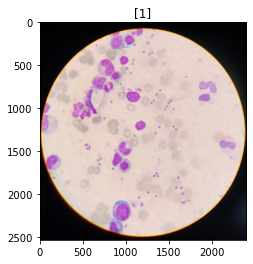

[[1]]


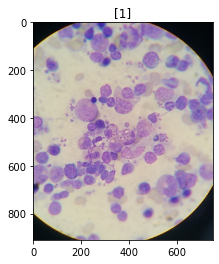

[[0]]


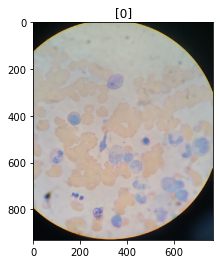

[[0]]


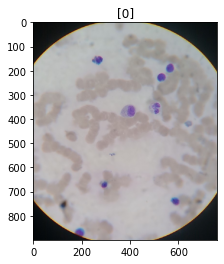

In [10]:
for image_path in imagens:
    img = preprocessamento_imagem(image_path)
    prediction = model.predict(img)
    prediction = (prediction > 0.5).astype(np.uint8)
    print(prediction)
    
    data = plt.imread(image_path)
    plt.imshow(data)
    plt.title(prediction[0])
    plt.show()

In [11]:
# model_path = 'modelos_webapp/inception_v3.h5'
# model = load_model(model_path)

Imagem: ['dataset/Negativo/CM200826-123635044.jpg'] --> Predição: [[0]]


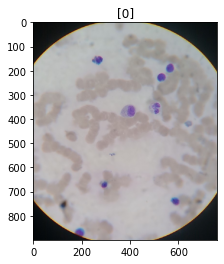

Imagem: ['dataset/Negativo/CM200826-133030002.jpg'] --> Predição: [[1]]


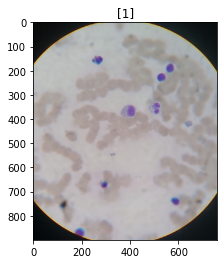

Imagem: ['dataset/Negativo/CM200826-145856008.jpg'] --> Predição: [[1]]


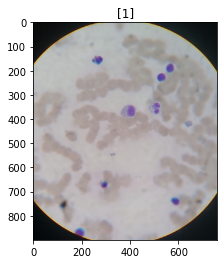

Imagem: ['dataset/Positivo/CM200826-154525005.jpg'] --> Predição: [[0]]


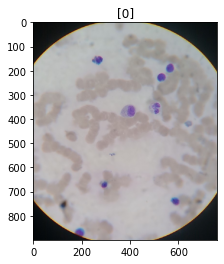

Imagem: ['dataset/Positivo/Imagem 37.jpg'] --> Predição: [[1]]


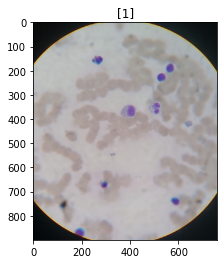

In [12]:
imgs_ = np.random.choice(len(dataset), 5)
for i in imgs_:
    img = preprocessamento_imagem2(dataset[i][0])
    prediction = model.predict(img)
    prediction = (prediction > 0.5).astype(np.uint8)
    print("Imagem: {} --> Predição: {}".format(dataset[i], prediction))
    
    data = plt.imread(image_path)
    plt.imshow(data)
    plt.title(prediction[0])
    plt.show()